In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Una red de **mundo pequeño** se caracteriza por un valor **bajo** en la longitud de los **caminos más cortos** pero un **alto** coeficiente de **clustering**.

Algunos ejemplos de redes de mundo pequeño en la vida real son:
- [Interacción de proteinas en el metabolismo de las bacterias](https://www.sciencedirect.com/science/article/pii/S0959440X04000776?via%3Dihub)
- La red de aeropuertos en el mundo (se enlazan si tienen vuelos de forma directa)
- La red de actores (se enlazan si aparecen en la misma película)

# Modelo de Strogratz y Watts (1998)

Strogratz y Watts diseñaron un algoritmo para generar redes de mundo pequeño. A grandes rasgos:
1. Se comienza con una red k-regular o de anillo, en donde cada nodo se enlaza a sus $\frac{k}{2}$ vecinos a la "derecha" y a la "izquierda"

Esta red tiene un alto coeficiente de clustering (cercano a 0.75) y un alto promedio de longitud de caminos mas cortos. (average path lenght)

2. Para cada nodo $i$ y para cada enlace $(i,j)$, con probabilidad $p$, se "desconecta" ese enlace y se conecta con otro nodo $h$ aleatorio de la red.

Por lo que el tamaño de la red se mantiene igual, pero el coeficiente de clustering y el promedio de longitud de caminos mas cortos cambian.

3. Si elegimos $p=0$ nos encontraremos en el caso de la red k-regular / anillo o "lattice", valores cercanos a $p=1$ nos dará una red aleatoria Erdos-Reny $G(n,p)$, y para valores intermedios, nos encontraremos en redes de mundo pequeño.

Este modelo tiene la desventaja que, a diferencia de las redes reales donde conocemos los caminos mas cortos, aquí están generados al azar, por lo que podríamos saber como "viaja" la información, por lo que se propuso una variante al modelo de S-W:

1. Toma una red k-regular
2. Forma nuevos enlaces al azar con probabilidad p

Así, tenemos un mayor control sobre el flujo de información, Se crean $\frac{nkp}{2}$ aristas nuevas conocidas como atajos

En este nuevo modelo, la probabilidad de que un vértice $i$ tenga s atajos es una Poisson(kp):

$e^{-kp}\frac{(kp)^s}{s!}$

Y, la distribución que siguen los grados (originales del anillo mas los "shortcuts") es una Poisson desplazada:

$e^{-kp}\frac{(kp)^{k´-k}}{(k´-k)!}$ con $s=k´-k \rightarrow k´=k+s$

Debe ser desplazada pues la Poisson toma valores de 0 en adelante, pero como iniciamos con una regular, no puede haber grado 0.

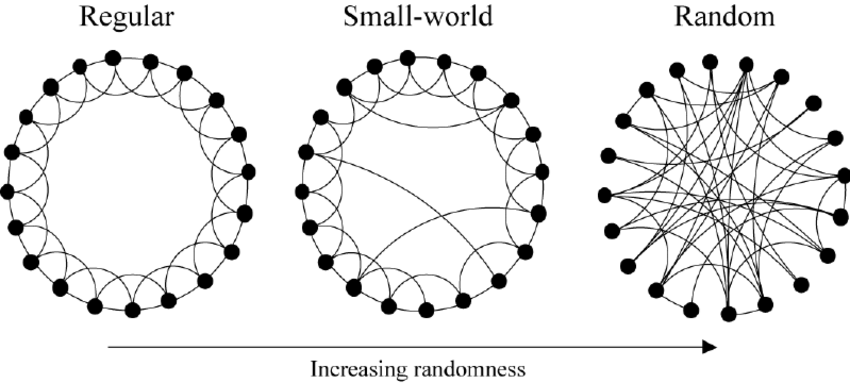

In [ ]:
def dibujar(G):
  plt.figure(figsize=(8, 8))
  nx.draw(G,
          pos=nx.circular_layout(grafo_small_world),
          node_size=10,
          node_color='#ff006e',
          edge_color='#8338ec',
          with_labels=False)
  plt.title("Red Small-World de Watts-Strogatz")
  plt.show()

In [ ]:
#Parámetros
num_nodos = 1000
vecinos_cercanos = 10  #Cada nodo se conecta a esta cantidad de vecinos más cercanos
prob_reconexion = 0.1  #Probabilidad de reconectar aristas


grafo_small_world = nx.watts_strogatz_graph(num_nodos, vecinos_cercanos, prob_reconexion)

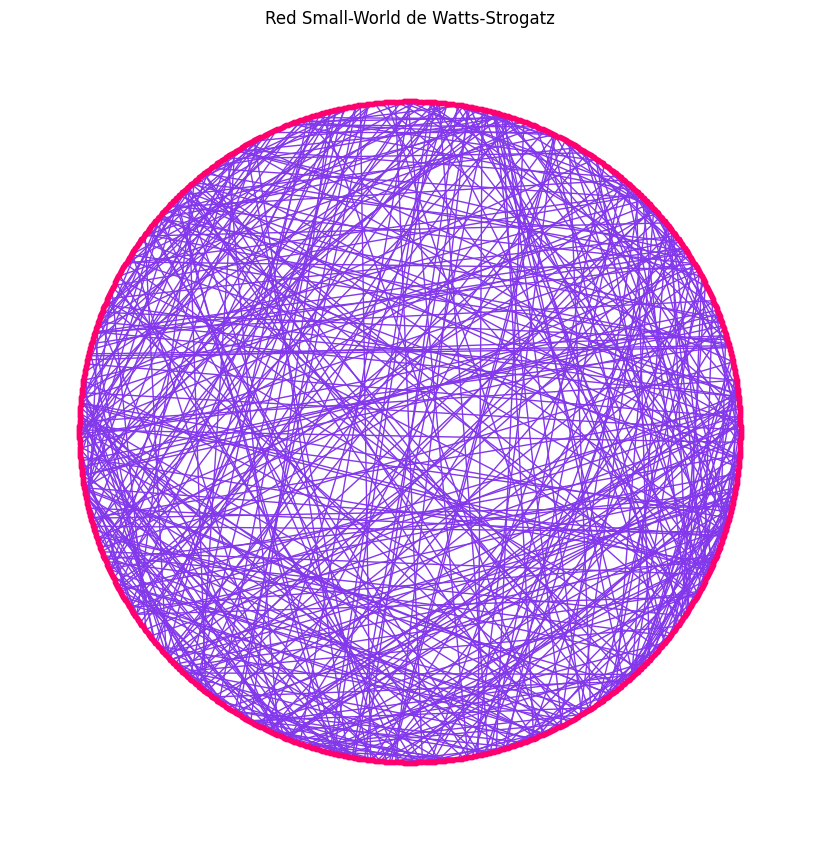

In [ ]:
dibujar(grafo_small_world)

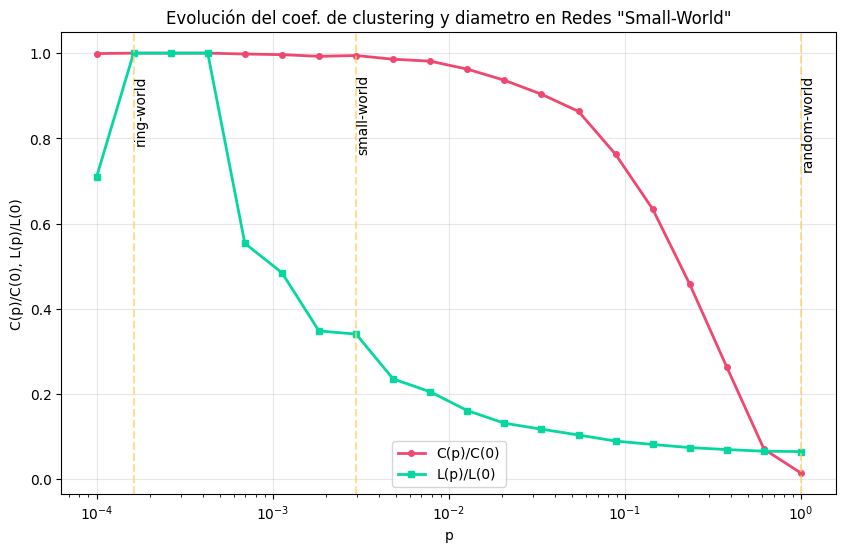

In [ ]:
num_nodos = 1000
vecinos_cercanos = 10
p_values = np.logspace(-4, 0, 20)

#Ring-World
G_referencia = nx.watts_strogatz_graph(num_nodos, vecinos_cercanos, 0)
C_referencia = nx.average_clustering(G_referencia)
L_referencia = nx.average_shortest_path_length(G_referencia)

C_normalizado = []
L_normalizado = []

for i, p in enumerate(p_values):
    G = nx.watts_strogatz_graph(num_nodos, vecinos_cercanos, p)

    C = nx.average_clustering(G)
    L = nx.average_shortest_path_length(G)

    C_normalizado.append(C / C_referencia)
    L_normalizado.append(L / L_referencia)


plt.figure(figsize=(10, 6))

plt.plot(p_values, C_normalizado, 'o-', label='C(p)/C(0)', linewidth=2, color='#ef476f', markersize=4)
plt.plot(p_values, L_normalizado, 's-', label='L(p)/L(0)', linewidth=2, color='#06d6a0', markersize=4)

plt.axvline(x=p_values[1], color='#ffd166', linestyle='--', alpha=0.7)
plt.text(p_values[1], 0.95, 'ring-world', rotation=90, verticalalignment='top')
plt.axvline(x=p_values[7], color='#ffd166', linestyle='--', alpha=0.7)
plt.text(p_values[7], 0.95, 'small-world', rotation=90, verticalalignment='top')
plt.axvline(x=p_values[-1], color='#ffd166', linestyle='--', alpha=0.7)
plt.text(p_values[-1], 0.95, 'random-world', rotation=90, verticalalignment='top')

plt.xscale('log')
plt.xlabel('p')
plt.ylabel('C(p)/C(0), L(p)/L(0)')
plt.title('Evolución del coef. de clustering y diametro en Redes "Small-World"')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Grafica del paper original:

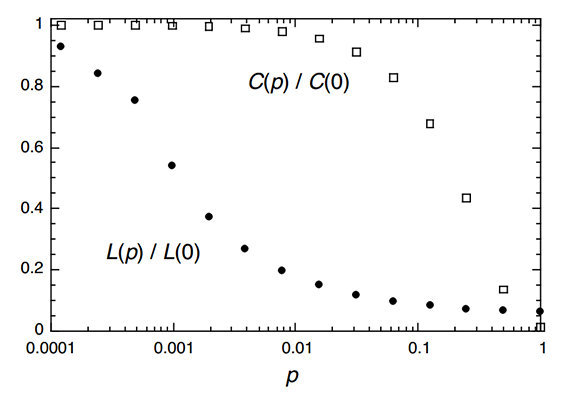

**Teóricamente:**

El **coeficiente de clustering** debería ser:
* $C = \frac{3(k-2)}{4(k-1)} = \frac{3(10-2)}{4(10-1)} = \frac{24}{36} = 0.667$ (ring-world, p=0)
* $C = \frac{k}{n} = \frac{10}{1000} = 0.01$ (aleatoria, p=1)
* Intermedio con $0 < p < 1$, manteniéndose alto para small-world

El **average path length** debería ser:
* $L \approx \frac{n}{2k} = 50$ (ring-world, p=0)  
* $L \approx \frac{\log(n)}{\log(k)} = 3$ (small-world/aleatoria, p>0)

In [ ]:
num_nodos = 1000
vecinos_cercanos = 10
p_values = np.logspace(-4, 0, 20)

def evaluar_metricas(G):
    print(f"""
        Número de nodos: {G.number_of_nodes()}
        Número de aristas: {G.number_of_edges()}
        Average path length: {nx.average_shortest_path_length(G):.3f}
        Clustering global: {nx.average_clustering(G):.3f}""")

# Evaluar para diferentes valores de p
print("=== RING-WORLD (p=0) ===")
G_anillo = nx.watts_strogatz_graph(num_nodos, vecinos_cercanos, 0)
evaluar_metricas(G_anillo)

print("\n=== SMALL-WORLD (p=0.01) ===")
G_smallworld = nx.watts_strogatz_graph(num_nodos, vecinos_cercanos, 0.01)
evaluar_metricas(G_smallworld)

print("\n=== RANDOM-WORLD (p=1) ===")
G_aleatoria = nx.watts_strogatz_graph(num_nodos, vecinos_cercanos, 1.0)
evaluar_metricas(G_aleatoria)

=== RING-WORLD (p=0) ===

        Número de nodos: 1000
        Número de aristas: 5000
        Average path length: 50.450
        Clustering global: 0.667

=== SMALL-WORLD (p=0.01) ===

        Número de nodos: 1000
        Número de aristas: 5000
        Average path length: 9.212
        Clustering global: 0.650

=== RANDOM-WORLD (p=1) ===

        Número de nodos: 1000
        Número de aristas: 5000
        Average path length: 3.268
        Clustering global: 0.011


¿Cómo comprobamos que una red de datos reales modelados es de mundo pequeño?

Para ello existen 2 métricas que comparan lo más importante de las *small-world* (*clustering* y *average path lenght*):

$\sigma = \frac{\frac{C}{C_r}}{\frac{L}{L_r}}$

$\omega = \frac{L_r}{L} - \frac{C}{C_l}$

En donde:
* $C$ es el coeficiente de clustering de la red que queremos saber si es de mundo pequeño.
* $C_r$ es el coeficiente de clustering de una red aleatoria.
* $L$ es la longitud promedio de los caminos más cortos de la red a probar.
* $L_r$ es la longitud promedio de los caminos más cortos de una red aleatoria.

Pero, ¿Cómo tomamos esa red aleatoria? sin un criterio claro dependeria totalmente de la aleatoria y en cada experimento daría algo diferente. La clave está en tomar una red aleatoria que tenga una densidad similar a la red que buscamos evaluar.

$D = \frac{2 \cdot ∣Enlaces∣}{∣Vertices∣(∣Vertices∣-1)}$

Interpretación de las métricas:

* Si $\sigma > 1$ decimos que la red es de mundo pequeño.
* $-1 < \omega < 1$. Si se acerca a -1 decimos que la topología de la red se asemeja a una k-regular o de anillo, Si se acerca a 0 decimos que es una red de mundo pequeño y si toma un valor cercano a 1, la red probablemente sea aleatoria.

In [ ]:
# --- Generar redes ---
G_regular      = nx.watts_strogatz_graph(70, 12, 0)
G_smallworld   = nx.watts_strogatz_graph(70, 12, 0.01)
G_random       = nx.watts_strogatz_graph(70, 12, 1)

# --- Calcular sigma y omega ---
sigma_regular  = nx.sigma(G_regular, niter=2, nrand=2, seed=42)
omega_regular  = nx.omega(G_regular, niter=2, nrand=2, seed=42)

sigma_small    = nx.sigma(G_smallworld, niter=2, nrand=2, seed=42)
omega_small    = nx.omega(G_smallworld, niter=2, nrand=2, seed=42)

sigma_random   = nx.sigma(G_random, niter=2, nrand=2, seed=42)
omega_random   = nx.omega(G_random, niter=2, nrand=2, seed=42)

print("=== Coeficientes de pequeño mundo ===")
print(f"Regular (p=0)        -> sigma = {sigma_regular:.3f}, omega = {omega_regular:.3f}")
print(f"Small-World (p=0.01) -> sigma = {sigma_small:.3f}, omega = {omega_small:.3f}")
print(f"Aleatoria (p=1)      -> sigma = {sigma_random:.3f}, omega = {omega_random:.3f}")

=== Coeficientes de pequeño mundo ===
Regular (p=0)        -> sigma = 2.489, omega = -0.438
Small-World (p=0.01) -> sigma = 3.222, omega = -0.258
Aleatoria (p=1)      -> sigma = 0.943, omega = 0.291
